In [1]:
import numpy as np 
import pandas as pd


In [2]:
#MOUNT GOOGLE DRIVE INTO COLAB
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#LOAD DATA INTO PANDAS
dataset = pd.read_csv('/content/drive/My Drive/Datasets/Datasets/house-prices-advanced-regression-techniques/train.csv')


In [4]:
dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
len(dataset)

1460

In [6]:
#CHECKING FOR NULL VALUES IN OUR DATASET
for column in dataset.columns:
    missing_values = dataset[column].isna().sum()
    if missing_values > 0:
        print(f"{column}: {missing_values} missing values")

LotFrontage: 259 missing values
Alley: 1369 missing values
MasVnrType: 8 missing values
MasVnrArea: 8 missing values
BsmtQual: 37 missing values
BsmtCond: 37 missing values
BsmtExposure: 38 missing values
BsmtFinType1: 37 missing values
BsmtFinType2: 38 missing values
Electrical: 1 missing values
FireplaceQu: 690 missing values
GarageType: 81 missing values
GarageYrBlt: 81 missing values
GarageFinish: 81 missing values
GarageQual: 81 missing values
GarageCond: 81 missing values
PoolQC: 1453 missing values
Fence: 1179 missing values
MiscFeature: 1406 missing values


In [7]:
#DROPING FEATURES THAT HAVE 90% NULL VALUES
dataset = dataset.drop(['PoolQC', 'Fence', 'MiscFeature','Alley'], axis=1)

In [8]:
len(dataset.columns)

77

In [9]:
#CHECKING THE DATA TYPES OF FEATURES 
print(len(dataset.select_dtypes(include=int).columns), " Integer features") 
print(len(dataset.select_dtypes(include=float).columns), "float features")
print(len(dataset.select_dtypes(include='O').columns), "string features")

35  Integer features
3 float features
39 string features


In [13]:
dataset.select_dtypes(include='O')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal


In [21]:
dataset.iloc[:,1].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [26]:
for column in dataset.columns:
    categorical_values = len(dataset[column].unique())
    if categorical_values < 26:
        print(f"{column}: {categorical_values} categorical values")

MSSubClass: 15 categorical values
MSZoning: 5 categorical values
Street: 2 categorical values
LotShape: 4 categorical values
LandContour: 4 categorical values
Utilities: 2 categorical values
LotConfig: 5 categorical values
LandSlope: 3 categorical values
Neighborhood: 25 categorical values
Condition1: 9 categorical values
Condition2: 8 categorical values
BldgType: 5 categorical values
HouseStyle: 8 categorical values
OverallQual: 10 categorical values
OverallCond: 9 categorical values
RoofStyle: 6 categorical values
RoofMatl: 8 categorical values
Exterior1st: 15 categorical values
Exterior2nd: 16 categorical values
MasVnrType: 5 categorical values
ExterQual: 4 categorical values
ExterCond: 5 categorical values
Foundation: 6 categorical values
BsmtQual: 5 categorical values
BsmtCond: 5 categorical values
BsmtExposure: 5 categorical values
BsmtFinType1: 7 categorical values
BsmtFinType2: 7 categorical values
Heating: 6 categorical values
HeatingQC: 5 categorical values
CentralAir: 2 cate

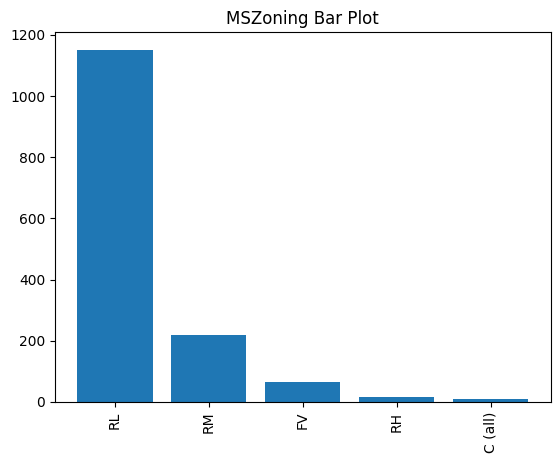

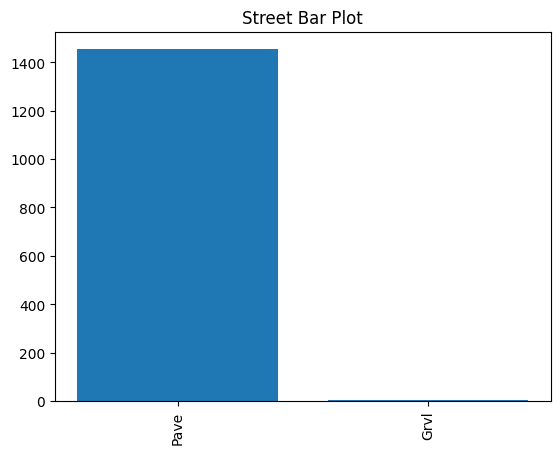

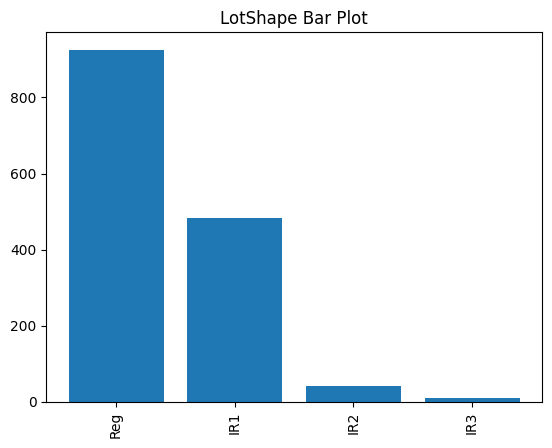

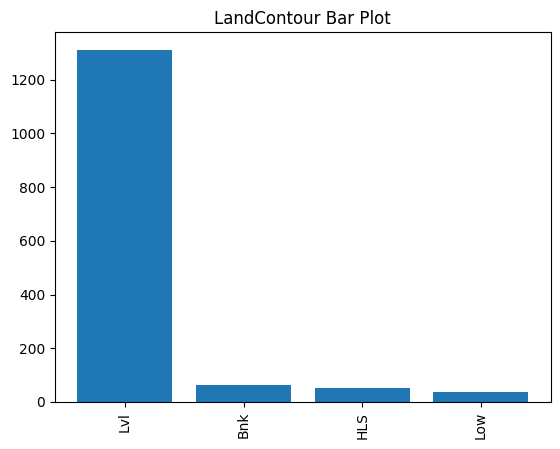

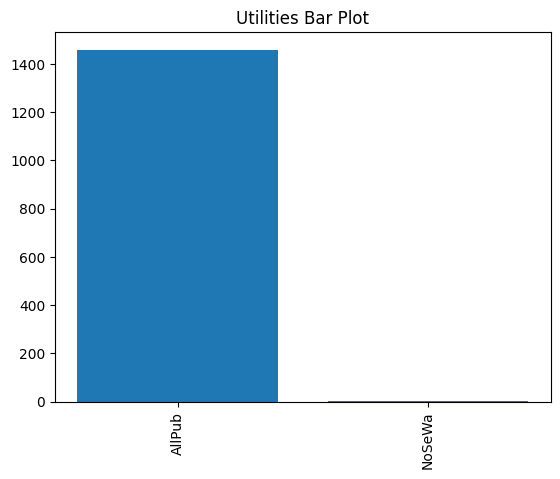

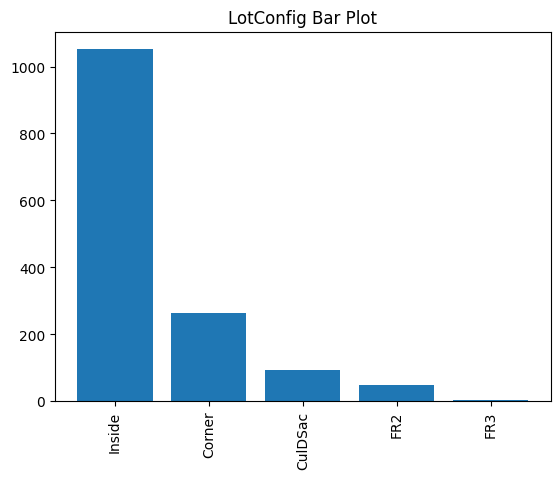

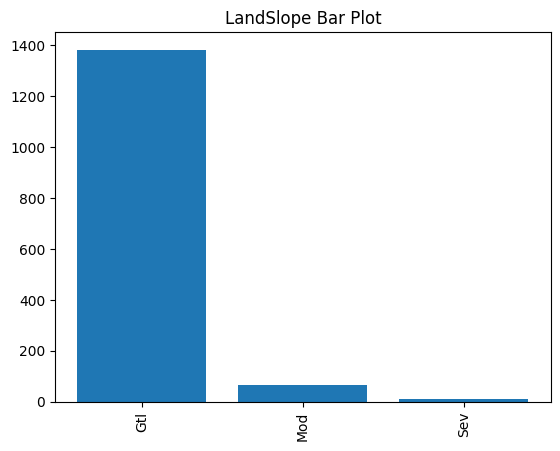

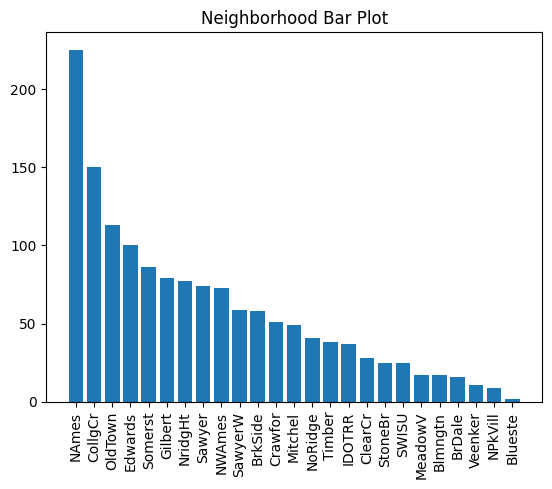

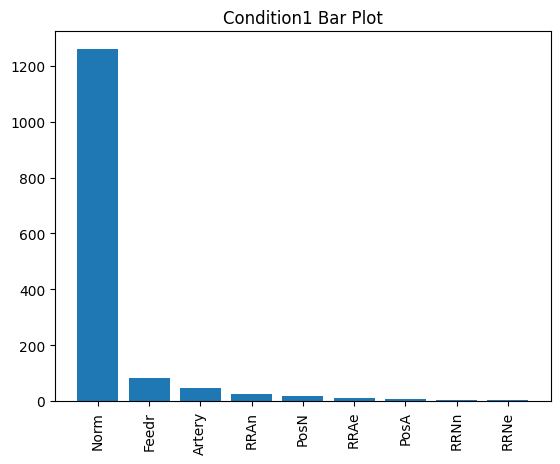

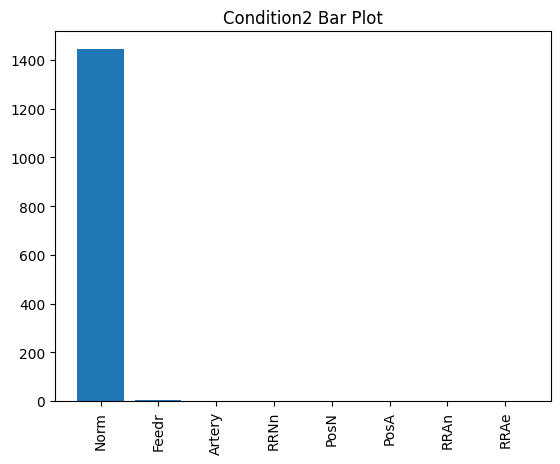

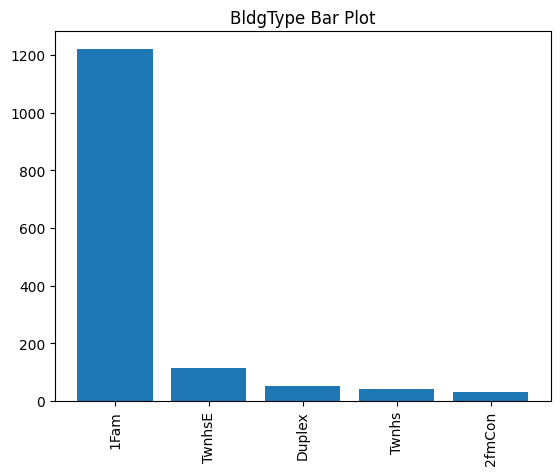

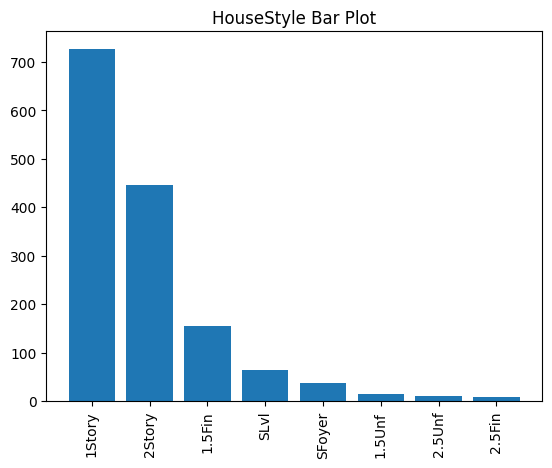

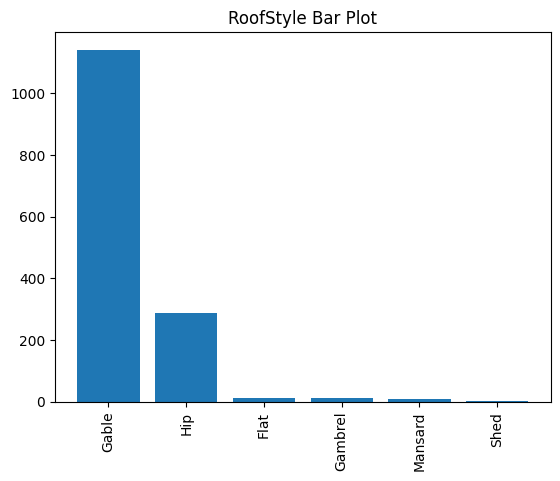

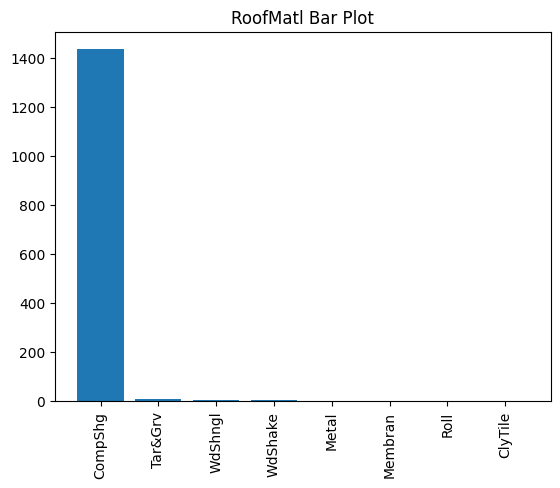

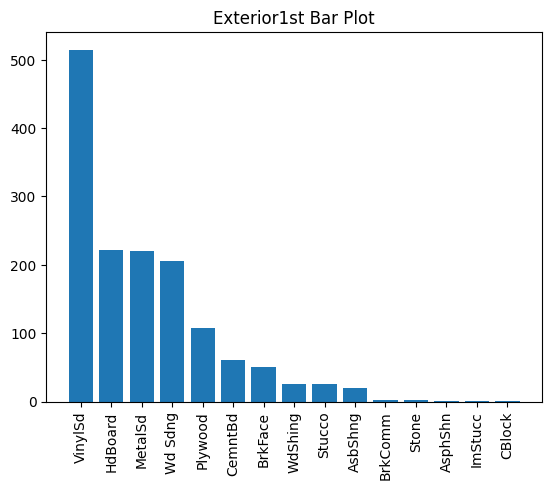

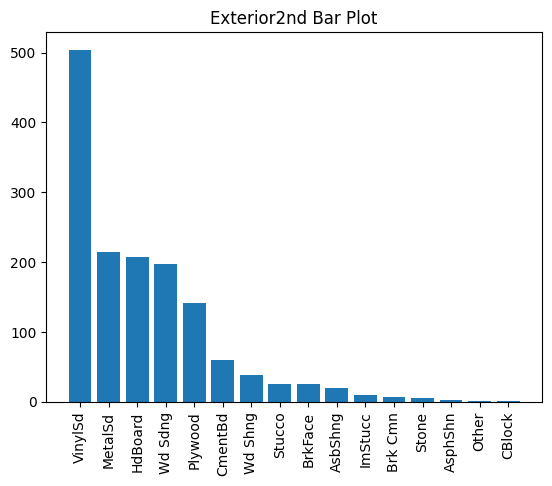

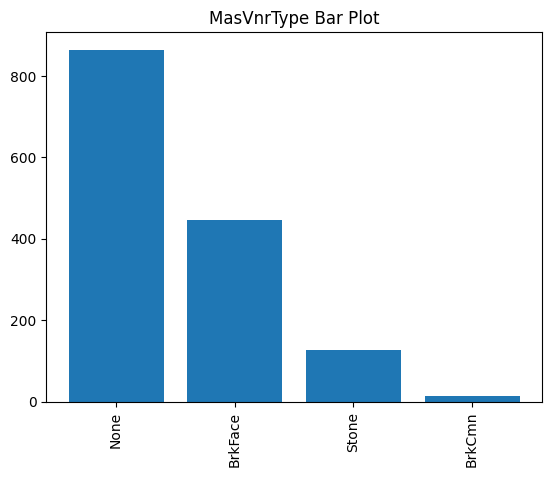

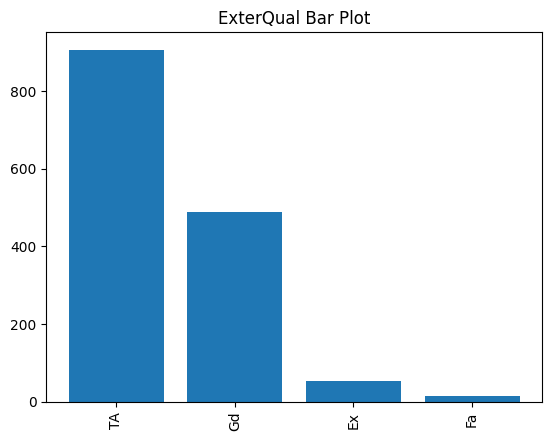

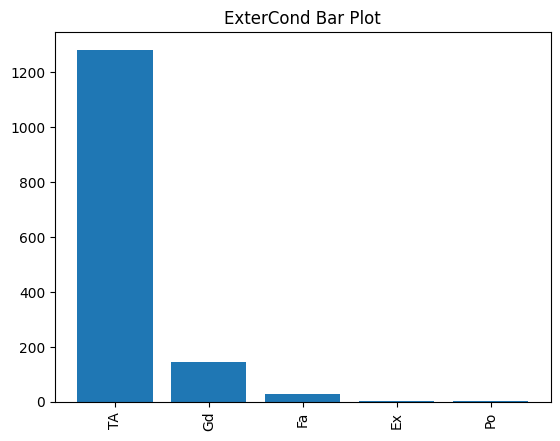

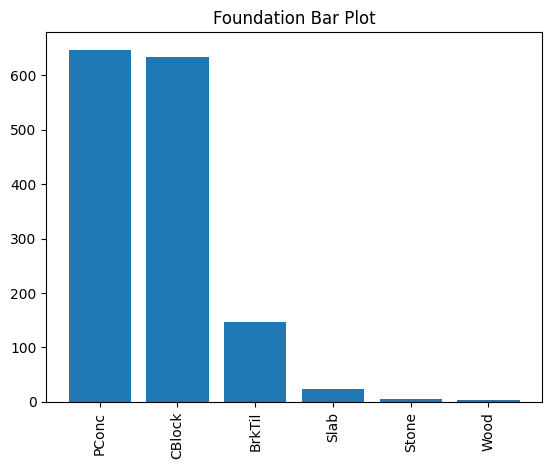

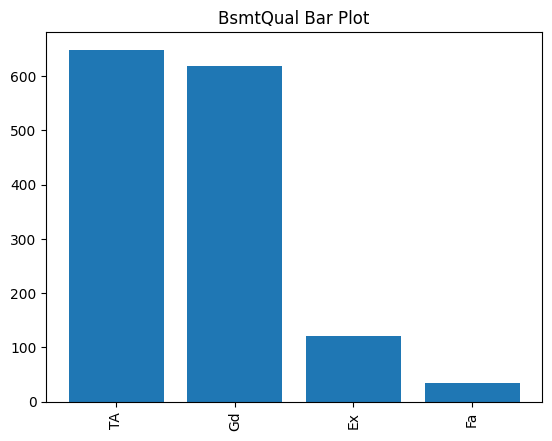

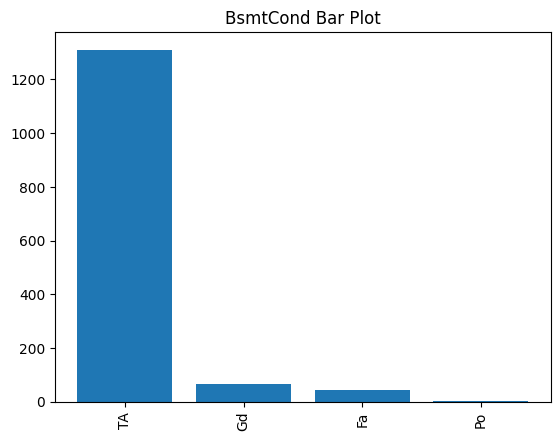

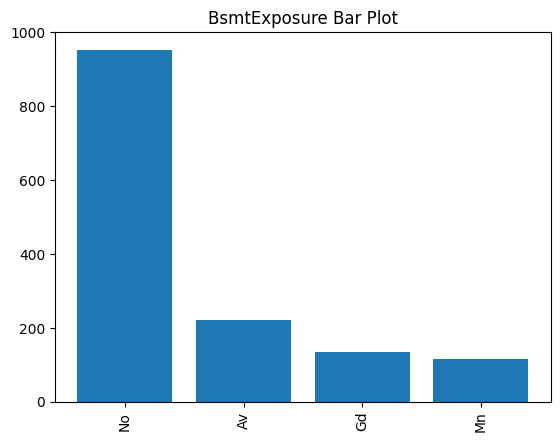

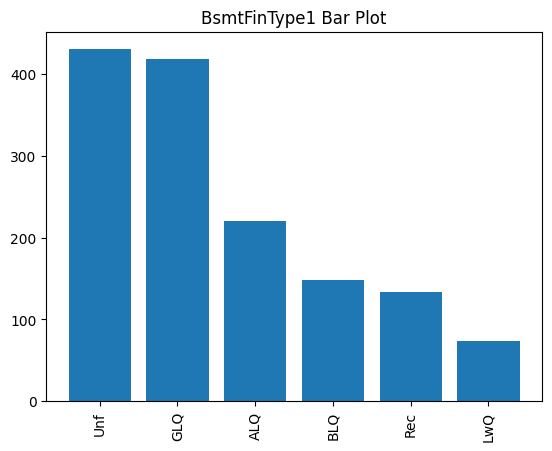

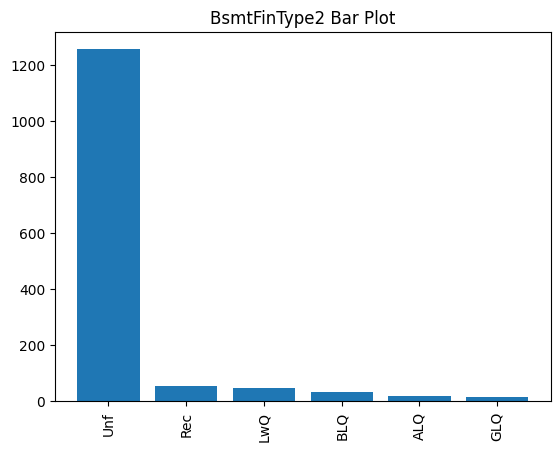

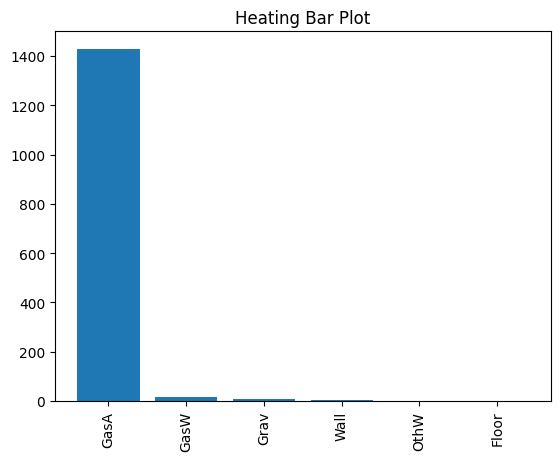

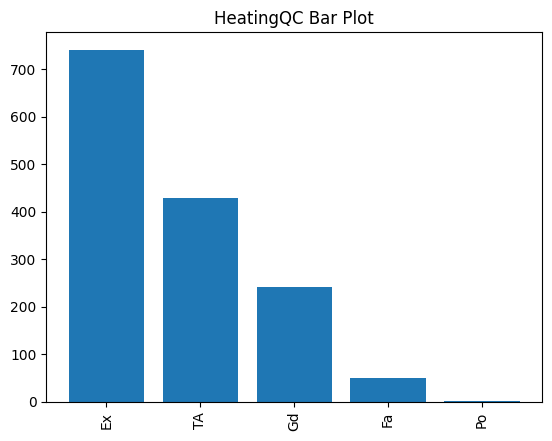

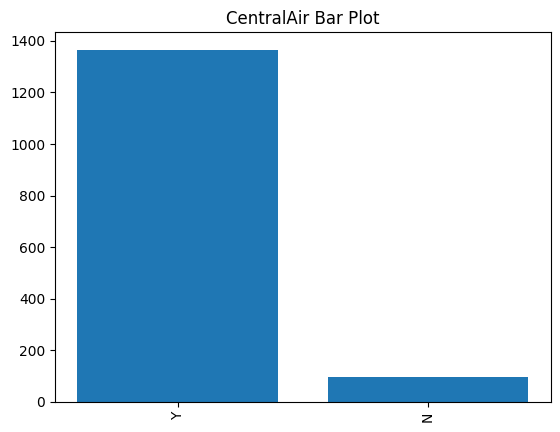

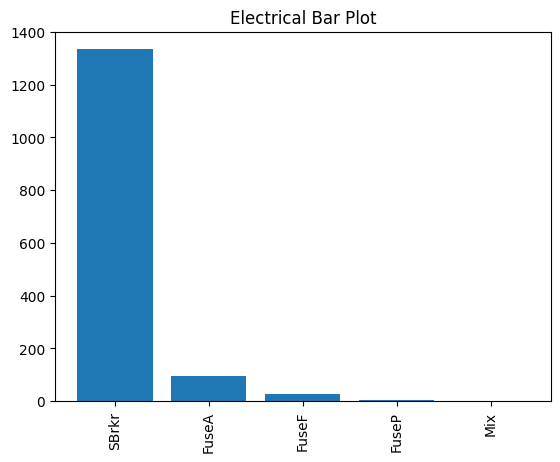

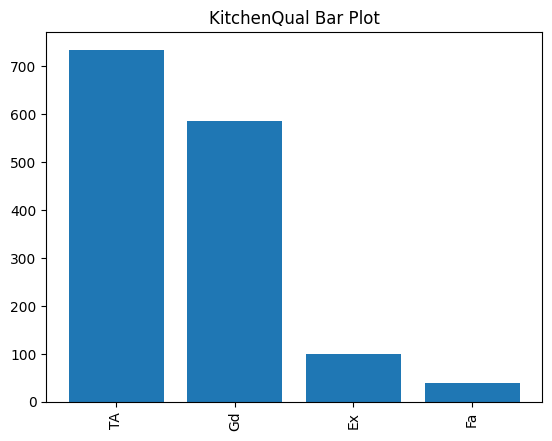

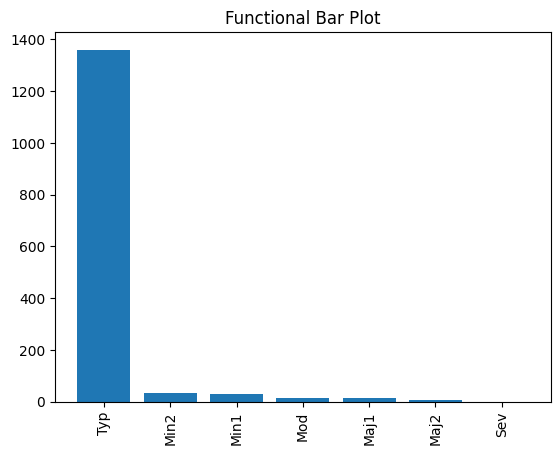

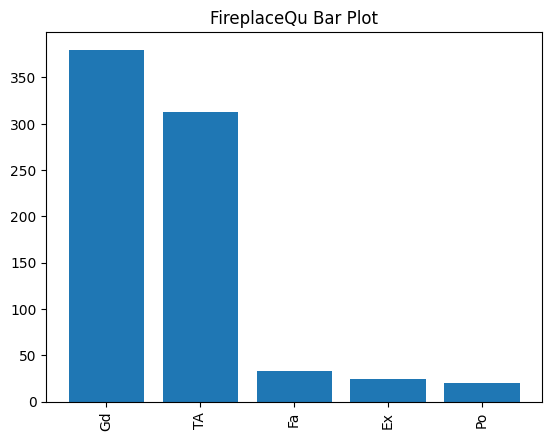

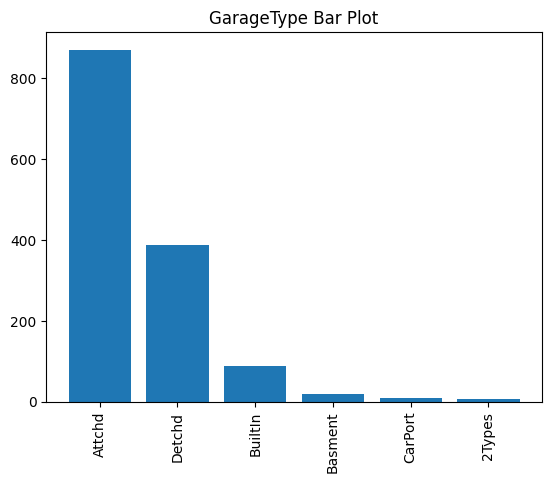

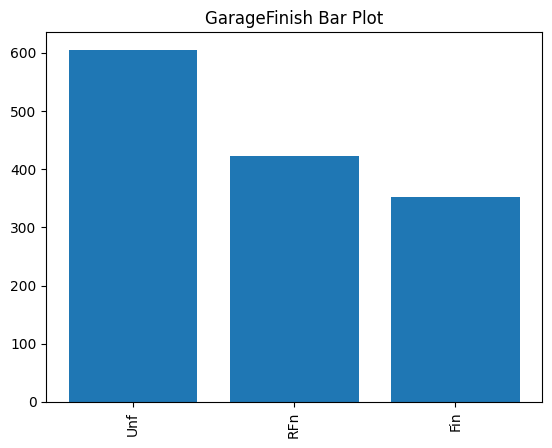

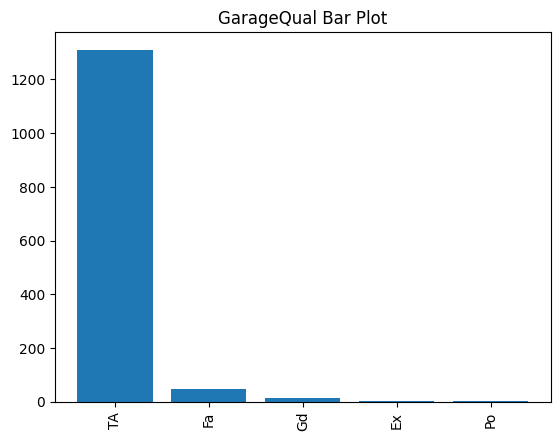

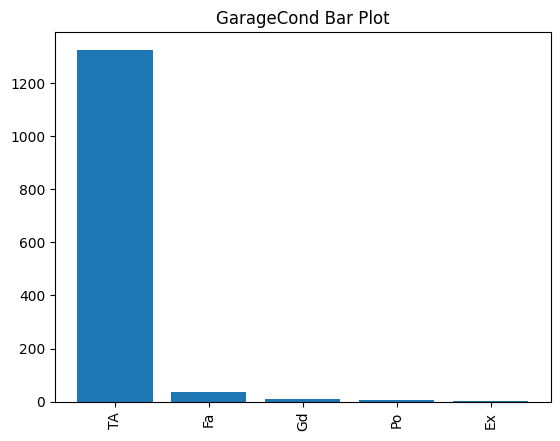

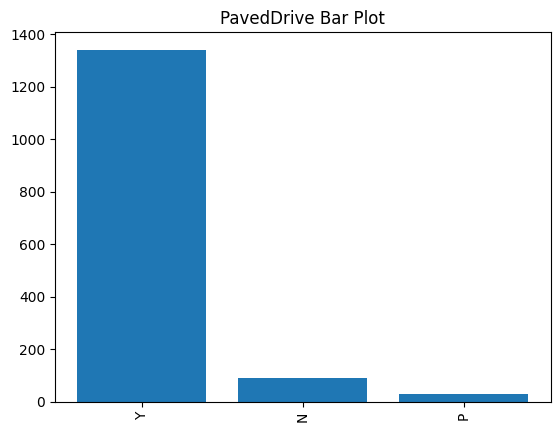

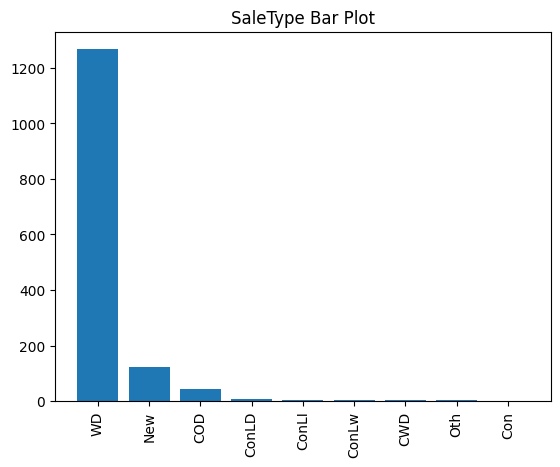

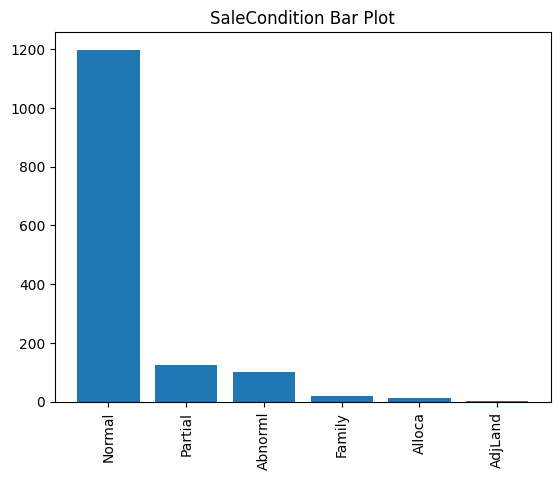

In [27]:
import matplotlib.pyplot as plt

# Loop through each column in the dataset
for column in dataset.columns:
    # Check if the column is categorical
    if dataset[column].dtype == 'object':
        # Create a dictionary to count the frequency of each unique value in the column
        value_counts = dataset[column].value_counts().to_dict()
        # Create a bar plot using the dictionary keys as the x-axis and the dictionary values as the y-axis
        plt.bar(value_counts.keys(), value_counts.values())
        # Add a title to the plot
        plt.title(f"{column} Bar Plot")
        # Rotate the x-axis labels for better readability
        plt.xticks(rotation=90)
        # Show the plot
        plt.show()
